In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
time = pd.read_csv('time-series-19-covid-combined.csv')

In [4]:
time

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
17915,2020-03-27,Zimbabwe,NaN,-20.0,30.0,5.0,0.0,1.0
17916,2020-03-28,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0
17917,2020-03-29,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0
17918,2020-03-30,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0


In [5]:
data

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Australia,2020-04-02 04:43:07,-25.000000,133.000000,5046,22,501,4523
1,Austria,2020-04-02 04:37:14,47.516200,14.550100,10711,146,1436,9129
2,Canada,2020-04-02 04:42:52,60.001000,-95.001000,9731,112,1526,0
3,China,2020-04-02 02:23:37,30.592800,114.305500,82394,3316,76426,2652
4,Denmark,2020-04-02 04:37:14,56.000000,10.000000,3290,104,971,2215
...,...,...,...,...,...,...,...,...
175,Venezuela,2020-04-02 04:37:14,6.423800,-66.589700,144,3,43,98
176,Vietnam,2020-04-02 04:37:14,14.058324,108.277199,222,0,63,159
177,West Bank and Gaza,2020-04-02 04:37:14,31.952200,35.233200,134,1,18,115
178,Zambia,2020-04-02 04:37:14,-13.133897,27.849332,36,0,0,36


In [6]:
country = data.drop(columns=['Last_Update','Lat','Long_'])

In [7]:
country

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Australia,5046,22,501,4523
1,Austria,10711,146,1436,9129
2,Canada,9731,112,1526,0
3,China,82394,3316,76426,2652
4,Denmark,3290,104,971,2215
...,...,...,...,...,...
175,Venezuela,144,3,43,98
176,Vietnam,222,0,63,159
177,West Bank and Gaza,134,1,18,115
178,Zambia,36,0,0,36


In [8]:
country.index = country['Country_Region']

In [9]:
time.index = time['Country/Region']

In [10]:
country = country.drop(columns=['Country_Region'])

In [11]:
time = time.drop(columns=['Country/Region','Province/State','Lat','Long'])

In [12]:
country

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Australia,5046,22,501,4523
Austria,10711,146,1436,9129
Canada,9731,112,1526,0
China,82394,3316,76426,2652
Denmark,3290,104,971,2215
...,...,...,...,...
Venezuela,144,3,43,98
Vietnam,222,0,63,159
West Bank and Gaza,134,1,18,115


In [13]:
time

,Date,Confirmed,Recovered,Deaths
Country/Region,,,,
Afghanistan,2020-01-22,0.0,0.0,0.0
Afghanistan,2020-01-23,0.0,0.0,0.0
Afghanistan,2020-01-24,0.0,0.0,0.0
Afghanistan,2020-01-25,0.0,0.0,0.0
Afghanistan,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
Zimbabwe,2020-03-27,5.0,0.0,1.0
Zimbabwe,2020-03-28,7.0,0.0,1.0
Zimbabwe,2020-03-29,7.0,0.0,1.0


In [14]:
country['Confirmed'].sort_values(ascending=False).index

Index(['US', 'Italy', 'Spain', 'China', 'Germany', 'France', 'Iran',
       'United Kingdom', 'Switzerland', 'Turkey',
       ...
       'Somalia', 'Gambia', 'Botswana', 'Central African Republic', 'Belize',
       'Burundi', 'Saint Vincent and the Grenadines', 'Sierra Leone',
       'Papua New Guinea', 'Timor-Leste'],
      dtype='object', name='Country_Region', length=180)

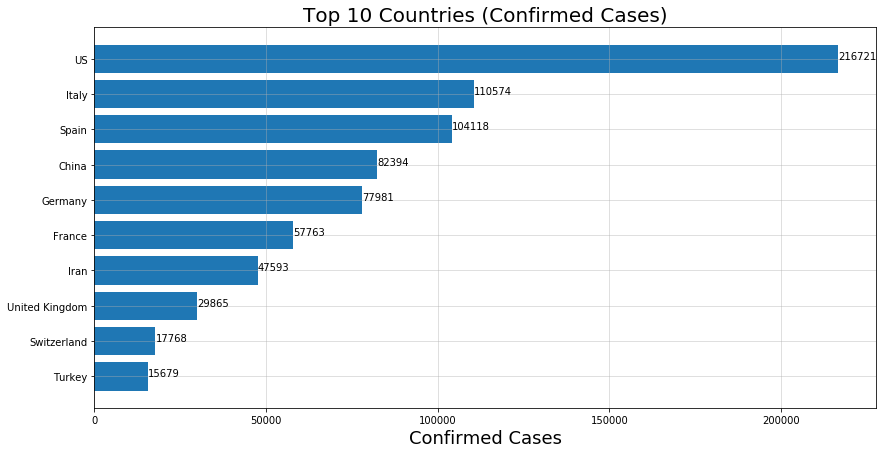

In [15]:
plt.figure(figsize=(14,7))
plt.barh(country['Confirmed'].sort_values().index[-10:],country['Confirmed'].sort_values().values[-10:])
for index, value in enumerate(country['Confirmed'].sort_values().values[-10:]):
    plt.text(value, index, str(value))
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.5)

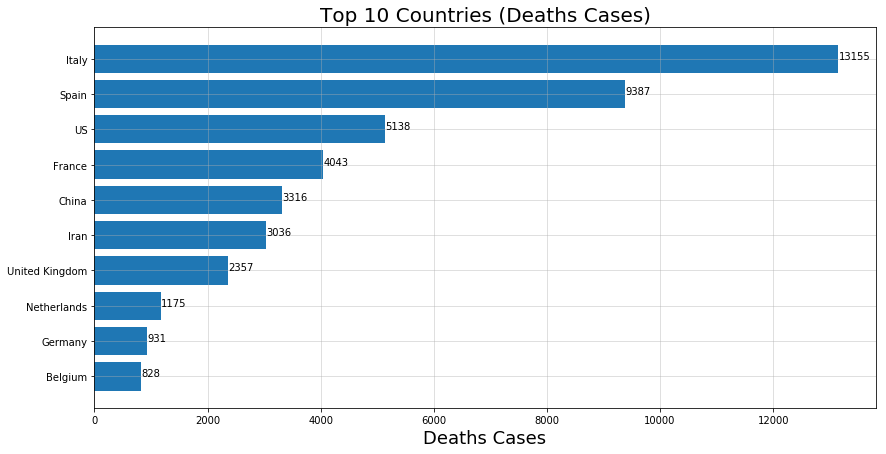

In [16]:
plt.figure(figsize=(14,7))
plt.barh(country['Deaths'].sort_values().index[-10:],country['Deaths'].sort_values().values[-10:])
for index, value in enumerate(country['Deaths'].sort_values().values[-10:]):
    plt.text(value, index, str(value))
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.5)

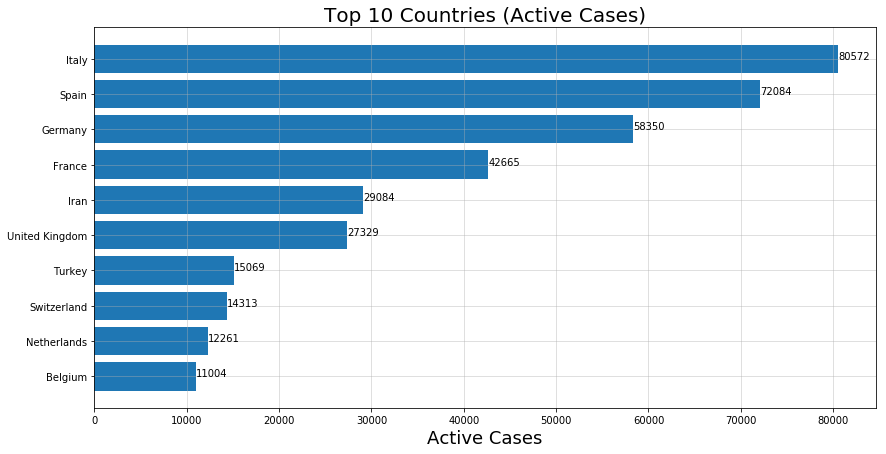

In [17]:
plt.figure(figsize=(14,7))
plt.barh(country['Active'].sort_values().index[-10:],country['Active'].sort_values().values[-10:])
for index, value in enumerate(country['Active'].sort_values().values[-10:]):
    plt.text(value, index, str(value))
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.5)

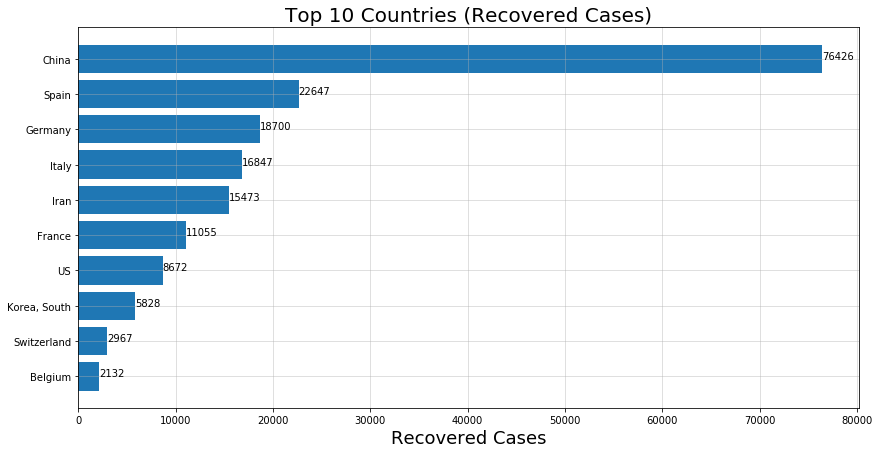

In [18]:
plt.figure(figsize=(14,7))
plt.barh(country['Recovered'].sort_values().index[-10:],country['Recovered'].sort_values().values[-10:])
for index, value in enumerate(country['Recovered'].sort_values().values[-10:]):
    plt.text(value, index, str(value))
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.5)

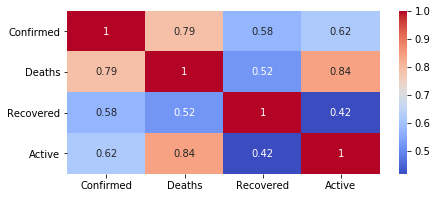

In [19]:
plt.figure(figsize=(7,3))
sns.heatmap(country.corr(),annot=True,cmap='coolwarm')

In [20]:
US = time.loc[time.index=='US',:][-35:]
US

,Date,Confirmed,Recovered,Deaths
Country/Region,,,,
US,2020-02-26,57.0,6.0,0.0
US,2020-02-27,58.0,6.0,0.0
US,2020-02-28,60.0,7.0,0.0
US,2020-02-29,68.0,7.0,1.0
US,2020-03-01,74.0,7.0,1.0
US,2020-03-02,98.0,7.0,6.0
US,2020-03-03,118.0,7.0,7.0
US,2020-03-04,149.0,7.0,11.0
US,2020-03-05,217.0,7.0,12.0


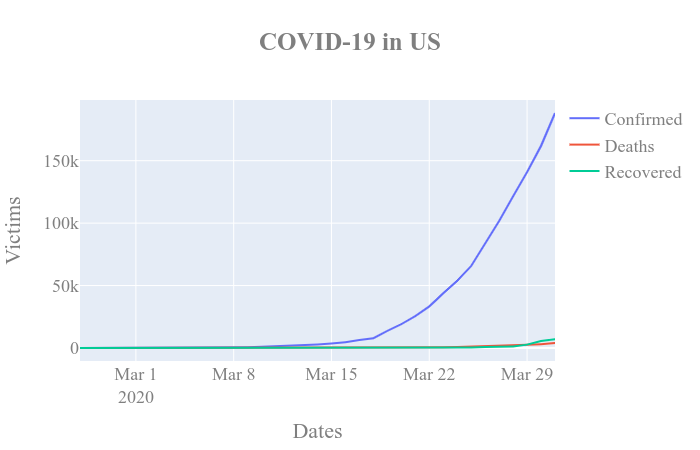

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=US.Date, y=US.Confirmed,
                    mode='lines',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=US.Date, y=US.Deaths,
                    mode='lines',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=US.Date, y=US.Recovered,
                    mode='lines',
                    name='Recovered'))
fig.update_layout(
    title="<b>COVID-19 in US</b>",
    xaxis_title="Dates",
    yaxis_title="Victims",
    title_x=0.5,
    font=dict(
        family="Franklin Gothic",
        size=18,
        color="#7f7f7f"
    )
)
fig.show("png")

In [22]:
India = time.loc[time.index=='India',:][-35:]
India

,Date,Confirmed,Recovered,Deaths
Country/Region,,,,
India,2020-02-26,3.0,3.0,0.0
India,2020-02-27,3.0,3.0,0.0
India,2020-02-28,3.0,3.0,0.0
India,2020-02-29,3.0,3.0,0.0
India,2020-03-01,3.0,3.0,0.0
India,2020-03-02,5.0,3.0,0.0
India,2020-03-03,5.0,3.0,0.0
India,2020-03-04,28.0,3.0,0.0
India,2020-03-05,30.0,3.0,0.0


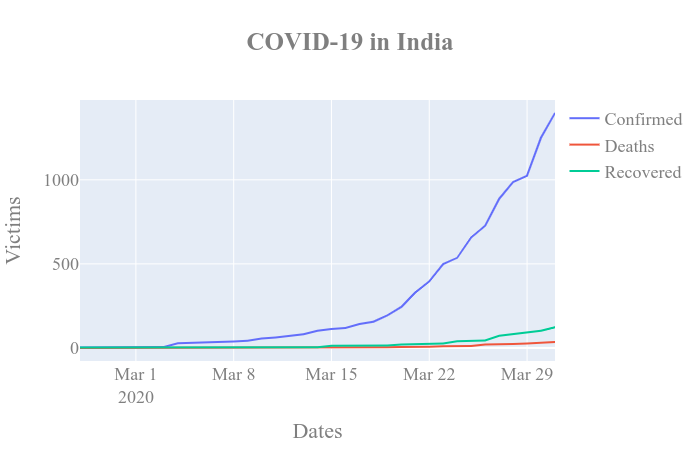

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=India.Date, y=India.Confirmed,
                    mode='lines',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=India.Date, y=India.Deaths,
                    mode='lines',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=India.Date, y=India.Recovered,
                    mode='lines',
                    name='Recovered'))
fig.update_layout(
    title="<b>COVID-19 in India</b>",
    xaxis_title="Dates",
    yaxis_title="Victims",
    autosize=False,
    width=1200,
    height=600,
    title_x=0.5,
    font=dict(
        family="Franklin Gothic",
        size=18,
        color="#7f7f7f"
    )
)
fig.show("png")

In [24]:
Italy = time.loc[time.index=='Italy',:][-45:]
Italy

,Date,Confirmed,Recovered,Deaths
Country/Region,,,,
Italy,2020-02-16,3.0,0.0,0.0
Italy,2020-02-17,3.0,0.0,0.0
Italy,2020-02-18,3.0,0.0,0.0
Italy,2020-02-19,3.0,0.0,0.0
Italy,2020-02-20,3.0,0.0,0.0
Italy,2020-02-21,20.0,0.0,1.0
Italy,2020-02-22,62.0,1.0,2.0
Italy,2020-02-23,155.0,2.0,3.0
Italy,2020-02-24,229.0,1.0,7.0


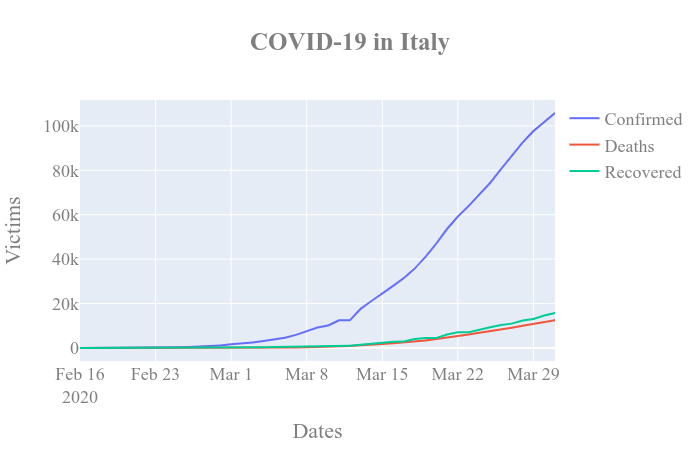

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Italy.Date, y=Italy.Confirmed,
                    mode='lines',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=Italy.Date, y=Italy.Deaths,
                    mode='lines',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=Italy.Date, y=Italy.Recovered,
                    mode='lines',
                    name='Recovered'))
fig.update_layout(
    title="<b>COVID-19 in Italy</b>",
    xaxis_title="Dates",
    yaxis_title="Victims",
    autosize=False,
    width=1200,
    height=600,
    title_x=0.5,
    font=dict(
        family="Franklin Gothic",
        size=18,
        color="#7f7f7f"
    )
)
fig.show("png")

In [26]:
times = pd.read_csv('time-series-19-covid-combined.csv')

In [27]:
times

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
17915,2020-03-27,Zimbabwe,NaN,-20.0,30.0,5.0,0.0,1.0
17916,2020-03-28,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0
17917,2020-03-29,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0
17918,2020-03-30,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0


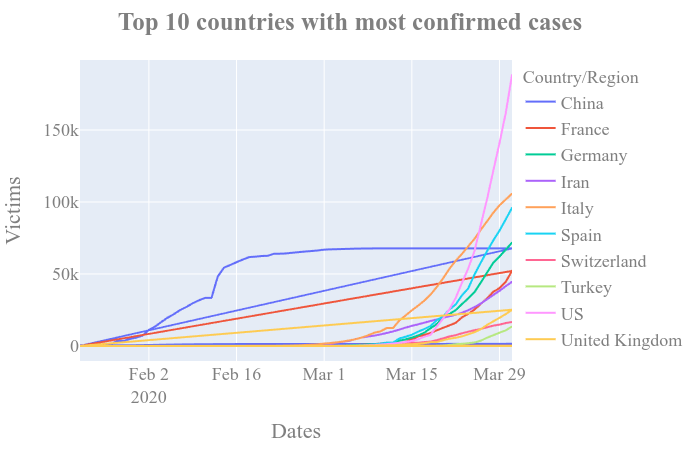

In [28]:
top30_countries = times.sort_values('Confirmed', ascending=False)['Country/Region'].unique()[:10]
top30_countries_df = times[times['Country/Region'].isin(top30_countries)]
fig = px.line(top30_countries_df,
              x='Date', y='Confirmed', color='Country/Region')
fig.update_layout(
    title="<b>Top 10 countries with most confirmed cases</b>",
    xaxis_title="Dates",
    yaxis_title="Victims",
    autosize=False,
    width=1200,
    height=600,
    title_x=0.5,
    font=dict(
        family="Franklin Gothic",
        size=18,
        color="#7f7f7f"
    )
)
fig.show("png")

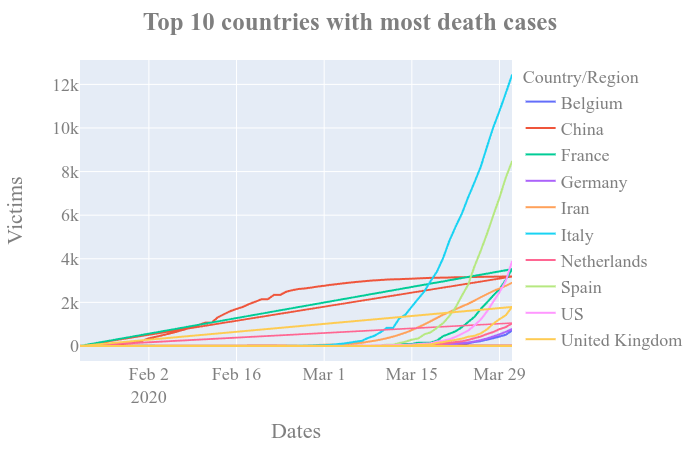

In [29]:
top30_countries = times.sort_values('Deaths', ascending=False)['Country/Region'].unique()[:10]
top30_countries_df = times[times['Country/Region'].isin(top30_countries)]
fig = px.line(top30_countries_df,
              x='Date', y='Deaths', color='Country/Region')
fig.update_layout(
    title="<b>Top 10 countries with most death cases</b>",
    xaxis_title="Dates",
    yaxis_title="Victims",
    autosize=False,
    width=1200,
    height=600,
    title_x=0.5,
    font=dict(
        family="Franklin Gothic",
        size=18,
        color="#7f7f7f"
    )
)
fig.show("png")